In [1]:
import numpy as np
import os
from PIL import Image
import csv
from sklearn.decomposition import PCA

In [2]:
train_img_path = './train_images'
test_img_path = './test_images'
train_label_file = 'train.csv'
test_label_file = 'test.csv'

In [3]:
train_img = []
train_label = []

In [4]:
img = 0
for file in os.listdir(train_img_path):
    img = Image.open(train_img_path + '/' + file)
    im = np.array(img).reshape(-1)
    train_img.append(im)
train_img = np.array(train_img)
#train_img.shape
#img

In [5]:
i = 0
with open(train_label_file, newline = '') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        if i != 0:
            train_label.append(int(row[1]))
        i = i + 1
train_label = np.array(train_label)
train_label.shape

(2528,)

In [14]:
pca = PCA(n_components=128)
pca_img = pca.fit_transform(train_img[-512:])
pca_inv_img = pca.inverse_transform(pca_img)

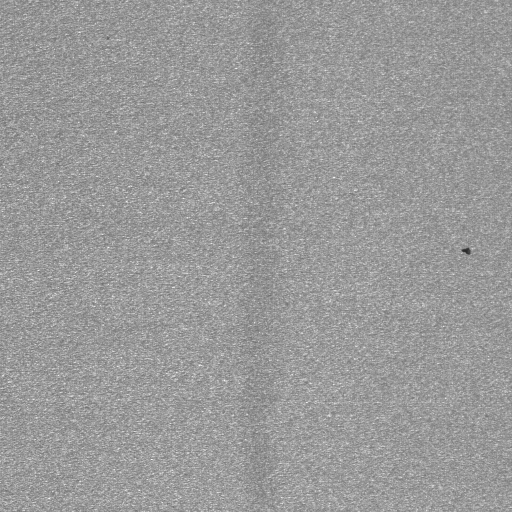

In [29]:
img_ori = Image.fromarray(train_img[-4].reshape(512,512), 'L')
img_ori

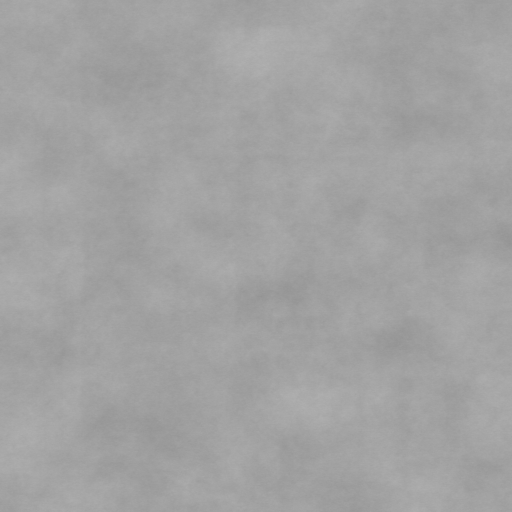

In [31]:
temp = pca_inv_img[-4]
img_compressed = (np.stack(temp,axis = 0)).astype(np.uint8)
img_pca = Image.fromarray(img_compressed.reshape(512,512), 'L')
img_pca

In [21]:
train_img[-1].shape

(262144,)